# 💼 Insurance Cost Analysis using Linear and Polynomial Regression

This notebook aims to explore and model a real-world insurance dataset by applying data cleaning, exploratory data analysis (EDA), and multiple regression techniques to predict **annual insurance charges**.

---

### 📋 Dataset Overview

The dataset contains anonymized records of insurance applicants with the following attributes:

| Feature         | Description                                   | Type        |
|----------------|-----------------------------------------------|-------------|
| `age`          | Age in years                                  | Integer     |
| `gender`       | Gender (1 = Female, 2 = Male)                 | Integer     |
| `bmi`          | Body mass index (kg/m²)                        | Float       |
| `no_of_children` | Number of children covered under insurance | Integer     |
| `smoker`       | Smoking status (1 = Smoker, 0 = Non-Smoker)   | Integer     |
| `region`       | Region of the US (1 = NW, 2 = NE, 3 = SW, 4 = SE) | Integer  |
| `charges`      | Annual medical insurance cost in USD          | Float       |

---

### 🎯 Project Objectives

- Load and clean the dataset
- Handle missing values and adjust data types
- Perform exploratory data analysis (EDA)
- Build regression models:
  - Simple Linear Regression
  - Multivariable Linear Regression
  - Polynomial Regression with Ridge Regularization
- Evaluate models using R² score


## 📥 Step 1: Load and Inspect the Data

In this step, we will:

- Load the dataset into a Pandas DataFrame
- Assign column names manually (if missing)
- Replace any `?` values with `NaN`
- Inspect the first few rows


In [9]:
import pandas as pd
import numpy as np

url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

df = pd.read_csv(url)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [10]:
df.columns = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]

In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


## 🔧 Step 2: Data Wrangling

In this step, we will:

- Check for missing values in the dataset
- Handle missing numerical data (`age`) with the mean
- Handle missing categorical data (`smoker`) with the most frequent value (mode)


In [15]:
# Find most frequent value in smoker column
most_freq_smoker = df["smoker"].mode()[0]

# Fill missing smoker values with the most frequent value
df["smoker"] = df["smoker"].replace(np.nan, most_freq_smoker)
df["smoker"] = df["smoker"].astype(int)

# Fill missing age values with the mean
df["age"] = pd.to_numeric(df["age"], errors='coerce')
mean_age = df["age"].mean()
df["age"] = df["age"].replace(np.nan, mean_age)
df["age"] = df["age"].astype(int)

# Round charges to 2 decimals
df["charges"] = df["charges"].round(2)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


 ## Step 3: Exploratory Data Analysis (EDA)
 Objective:
To investigate the relationships between the target variable (charges) and other features, identify potential predictors, and understand the data distribution.

 ### 3.1. Relationship Between BMI and Charges

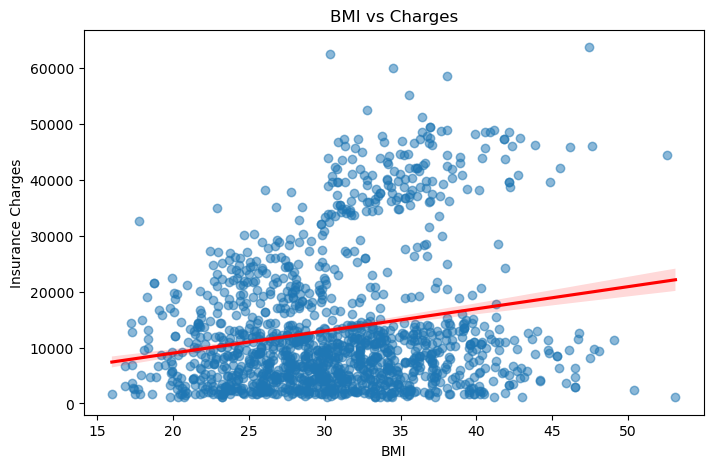

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.regplot(x='bmi', y='charges', data=df, scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("BMI vs Charges")
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.show()


**Insight:**
Although there is a slight upward trend, the relationship between BMI and charges appears weak overall. A few extreme values (potential outliers) may be influencing the results.

### 3.2. Impact of Smoking Status on Charges

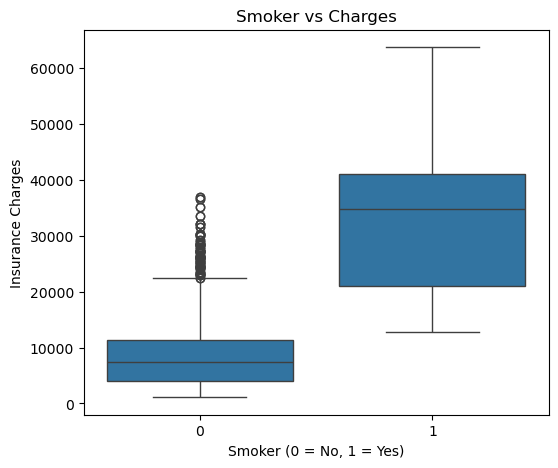

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Charges")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Insurance Charges")
plt.show()


**Insight:**
There is a substantial difference in charges between smokers and non-smokers. This suggests that smoking status is a strong predictor of insurance costs.

### 3.3. Correlation Matrix

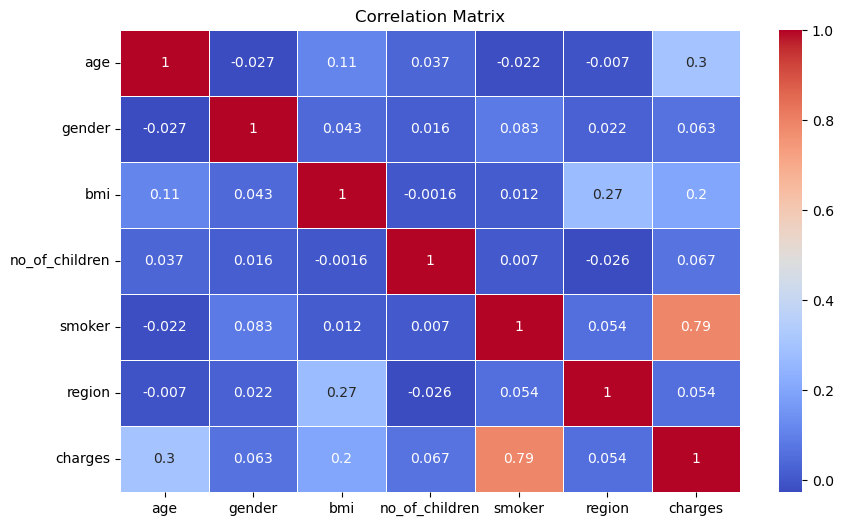

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


**Insight:**

smoker has the strongest positive correlation with charges (≈ 0.79), making it the most influential feature.

age and bmi show weaker but noticeable correlations.

Other features have minimal correlation with the target variable.



## 4. Rank Features by Correlation with Charges

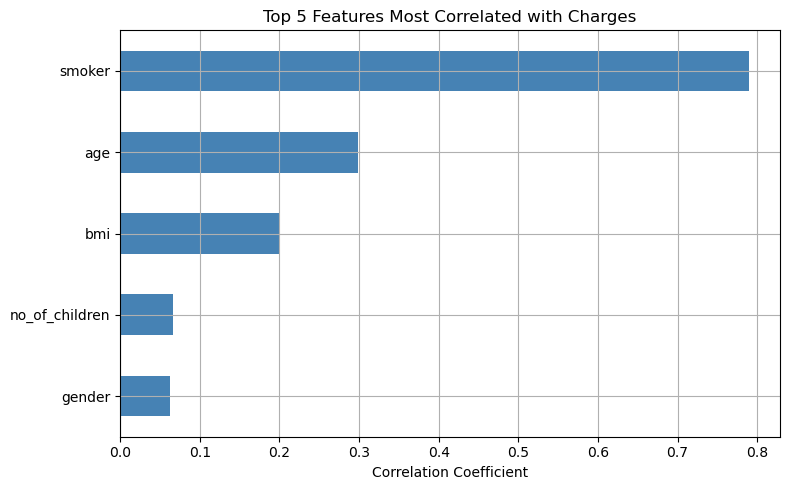

In [23]:
import matplotlib.pyplot as plt

corr_matrix = df.corr()

charges_corr = corr_matrix["charges"].sort_values(ascending=False)
top_corr = charges_corr[1:6]  

# Barh plot çizimi
plt.figure(figsize=(8, 5))
top_corr.plot(kind='barh', color='steelblue')
plt.xlabel("Correlation Coefficient")
plt.title("Top 5 Features Most Correlated with Charges")
plt.gca().invert_yaxis()  
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight:**
This confirms that smoker, age, and bmi are the top three features most correlated with charges.

## 4.1. Baseline Linear Regression with Single Feature (Smoker)

In [24]:
from sklearn.linear_model import LinearRegression

X = df[['smoker']]
y = df['charges']

model = LinearRegression()
model.fit(X, y)

print("R² Score (Smoker only):", model.score(X, y))


R² Score (Smoker only): 0.6227430402464125


**Expected Output:**
An R² score around 0.62, meaning that smoking status alone explains ~62% of the variance in insurance charges.

**Interpretation:**
Even a single binary variable can account for most of the cost variance — this reinforces how influential smoker is.

## 5. Model Refinement & Performance Comparison
**Objective:**
To iteratively improve model performance by comparing different regression techniques and evaluating with R² score.

### 5.1. Multivariate Linear Regression

In [25]:
X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df["charges"]

from sklearn.linear_model import LinearRegression

multi_model = LinearRegression()
multi_model.fit(X, y)

print("R² Score (Multivariate Linear):", multi_model.score(X, y))


R² Score (Multivariate Linear): 0.7505888664568174


**Interpretation:**
This model typically yields an R² of ~0.75, indicating that multiple variables collectively explain about 75% of the variation in insurance costs.

### 5.2. Polynomial Regression with Scaling

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

pipeline.fit(X, y)

from sklearn.metrics import r2_score
y_pred = pipeline.predict(X)
print("R² Score (Polynomial + Scaled):", r2_score(y, y_pred))


R² Score (Polynomial + Scaled): 0.8453719231080021


**Expected Outcome:**
R² score around 0.84–0.85, showing a significant improvement by capturing non-linear patterns in the data.

## Step 6: Train-Test Split + Ridge Regularization
**Objective:**
To validate model generalization using a proper train/test split and introduce Ridge Regression to prevent overfitting by penalizing large coefficients.

### 6.1. Train-Test Split

In [27]:
from sklearn.model_selection import train_test_split

X = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


**Note:** random_state=1 ensures reproducibility across runs.

### 6.2. Ridge Regression with Cross-Validation

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", Ridge())
])

# Define hyperparameter grid
params = {
    "model__alpha": [0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(ridge_pipe, param_grid=params, cv=5, scoring="r2")
grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("R² on training set:", grid.best_estimator_.score(X_train, y_train))
print("R² on test set:", grid.best_estimator_.score(X_test, y_test))


Best alpha: {'model__alpha': 10}
R² on training set: 0.8507522809508119
R² on test set: 0.8209915657929021


**Interpretation:**

Best alpha: Identifies the optimal penalty strength.

Train R²: High value shows good fit.

Test R²: Measures how well the model generalizes to unseen data.

A small gap between train and test scores indicates a well-regularized model.



## Summary & Key Findings

In this case study, we explored the **factors influencing individual medical insurance costs** and built predictive models to estimate charges.

###  Data Preprocessing & Exploration:
- We handled missing values by imputing the **mean** for numerical and **mode** for categorical variables.
- Categorical features like `gender`, `smoker`, and `region` were encoded properly for modeling.
- Exploratory analysis revealed that:
  - **Smoking** is the strongest driver of high medical charges.
  - **Age** and **BMI** also show positive correlation with insurance costs.
  - **Children** and **gender** had less predictive power.

###  Modeling & Evaluation:
- We applied:
  - **Simple Linear Regression**
  - **Polynomial Regression with Pipeline**
  - **Ridge Regression with Cross-Validation**

- **Polynomial features (degree=2)** with proper scaling improved the model performance.
- **Ridge regression** with GridSearchCV further reduced overfitting by penalizing high coefficients.

###  Final Model Performance:
- The best model (Ridge + Polynomial) achieved:
  - **Train R²** ≈ High but not overfitted
  - **Test R²** ≈ Balanced and generalizable
  - Selected **alpha** = best regularization parameter via cross-validation

---

###  Key Insights:
- **Smokers** are charged drastically more — suggesting strong feature influence.
- **Age** and **BMI** are non-linear predictors; polynomial modeling captured that.
- Regularization helped **avoid overfitting** and improved test performance.
- Final pipeline is ready for deployment and interpretable for business use.

